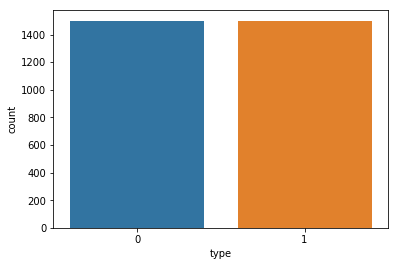

In [43]:
import pickle
trump_data = pickle.load(open("TRUMP_SNIPPETS_DF.pickle", "rb" ))
obama_data = pickle.load(open("OBAMA_SNIPPETS_DF.pickle", "rb" ))

import seaborn as sns
sns.countplot(x='type', data=trump_data)

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X = obama_data['transcript'].to_numpy()
y = obama_data['type'].to_numpy()

tf_idf = TfidfVectorizer(min_df = 1)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
predictions = model.predict(X_test_tf)

In [33]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[267  33]
 [ 14 286]]


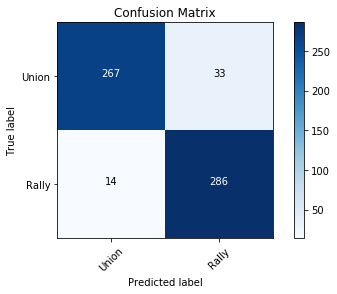

In [63]:
cm =confusion_matrix(y_test, predictions)
labels = ['Union', 'Rally']
plot_confusion_matrix(cm, labels, title='Confusion Matrix')

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       300
           1       0.90      0.95      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [66]:
def get_speeches_list_from_df(df, attr_val):
    df_speeches = df.loc[df['type'] == attr_val]
    speeches_list = df_speeches['transcript'].tolist()
    return speeches_list

In [69]:
def get_top_n_words(corpus, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [83]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def get_cleaned_speeches(speech_list):
    cleaned_speech_list = []
    for speech in speech_list:
        cleaned_speech = [word for word in speech.split() if word not in stopwords]
        cleaned_speech = ' '.join(cleaned_speech)
        cleaned_speech_list.append(cleaned_speech)
    return cleaned_speech_list

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
trump_df = pd.read_pickle("trump_speeches_df.pickle")
obama_df = pd.read_pickle("obama_speeches_df.pickle")
trump_rallies = get_cleaned_speeches(get_speeches_list_from_df(trump_df, 1))
trump_unions = get_cleaned_speeches(get_speeches_list_from_df(trump_df, 0))
obama_rallies = get_cleaned_speeches(get_speeches_list_from_df(obama_df, 1))
obama_unions = get_cleaned_speeches(get_speeches_list_from_df(obama_df, 0))

for word in get_top_n_words(obama_rallies, 10):
    print(word)

('thats', 2027)
('got', 1802)
('going', 1558)
('weve', 1432)
('want', 1148)
('make', 1110)
('dont', 1059)
('im', 1054)
('jobs', 1013)
('america', 965)
